# Project-11- Insurance Claim & Fraud

Business case

Claim related fraud is a huge problem in the insurance industry. It is quite complex and difficult to identify those unwanted claims. We will be trying to troubleshoot and help the General Insurance industry with this problem.
The data that we have is from Automobile Insurance. We will be creating a predictive model that predicts the probability of insurance claim and whether is fraudulent or not. The prediction of insuarance claim taken is regression problem and the answer between YES/NO in insurance fraud case is a Binary Classification task . A comparison study has been performed to understand which ML algorithm suits best to the dataset.

In [1]:
# lets import esential libraries :
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load the dataset :
data=pd.read_csv('insurance_claim.csv')

#EDA Process

In [3]:
data.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [4]:
data.dtypes

Customer                          object
Country                           object
State Code                        object
State                             object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Claim Reason                      object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class   

In [5]:
data.columns

Index(['Customer', 'Country', 'State Code', 'State', 'Claim Amount',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [6]:
data.shape

(9134, 26)

In [7]:
data.nunique()

Customer                         9134
Country                             1
State Code                          5
State                               5
Claim Amount                     8041
Response                            2
Coverage                            3
Education                           5
Effective To Date                  59
EmploymentStatus                    5
Gender                              2
Income                           5694
Location Code                       3
Marital Status                      3
Monthly Premium Auto              202
Months Since Last Claim            36
Months Since Policy Inception     100
Number of Open Complaints           6
Number of Policies                  9
Policy Type                         3
Policy                              9
Claim Reason                        4
Sales Channel                       4
Total Claim Amount               5106
Vehicle Class                       6
Vehicle Size                        3
dtype: int64

In [8]:
# lets check the nullvalues:
data.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

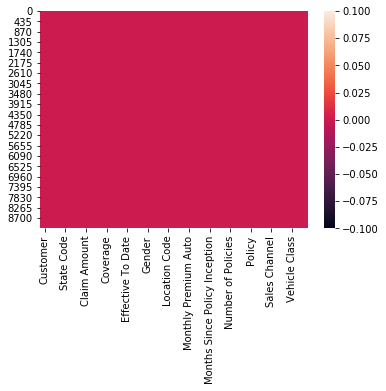

In [9]:
# with the help heatmap check the null values :
sns.heatmap(data.isnull())

In [10]:
# Stastical Analysis of all columns mean max etc :
data.describe()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [11]:
# correlation between all the coloumns :
dfr=data.corr()
dfr

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Claim Amount,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


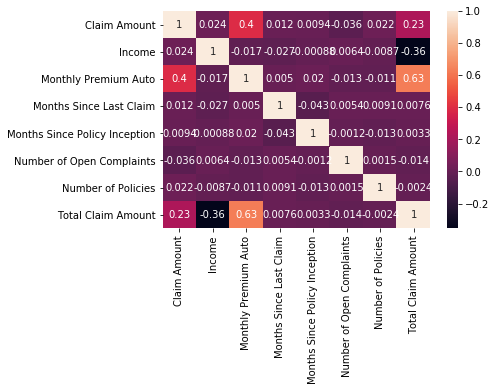

In [12]:
sns.heatmap(dfr,annot=True)

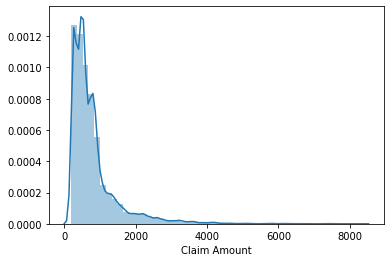

In [13]:
# lets visualise the claim amount :
data['Claim Amount'].unique()
sns.distplot(data['Claim Amount'])

['F' 'M']


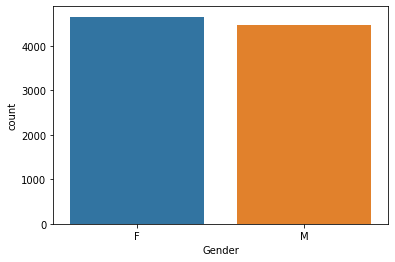

In [14]:
# univariate analysis of gender female are more than male :
print(data['Gender'].unique())
sns.countplot(x='Gender',data=data)

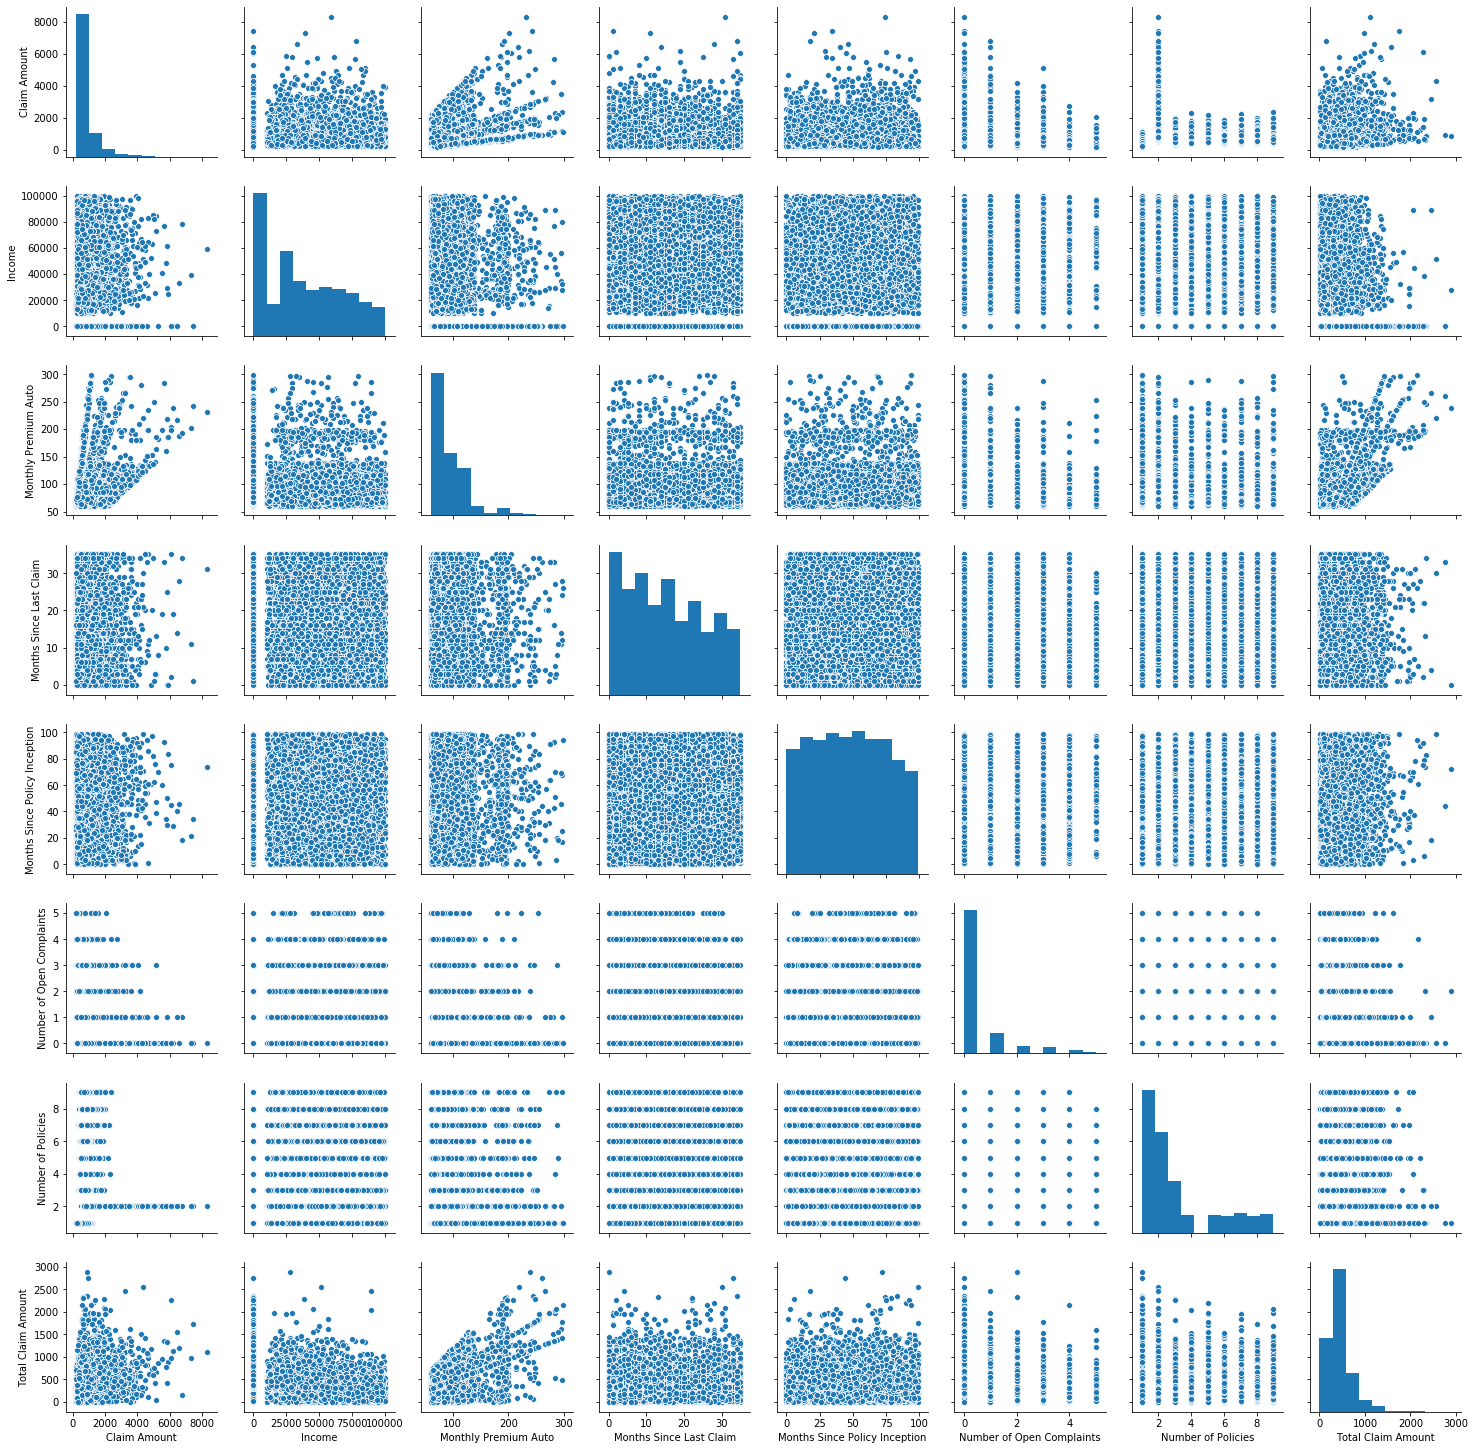

In [15]:
sns.pairplot(data)

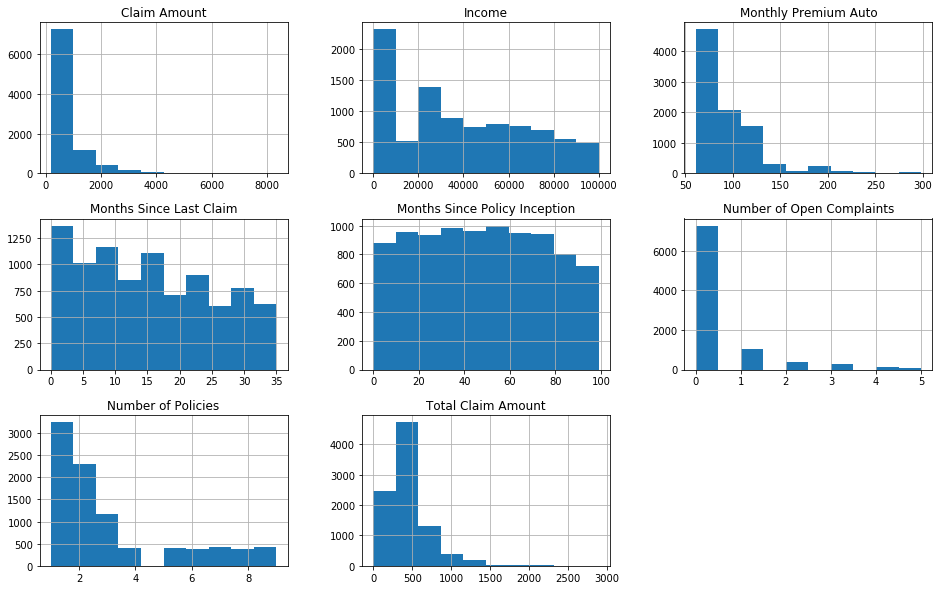

In [16]:
# lets check the frequency distribution with the help of histogram :
data.hist(figsize=(16,10))
plt.show()

['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']


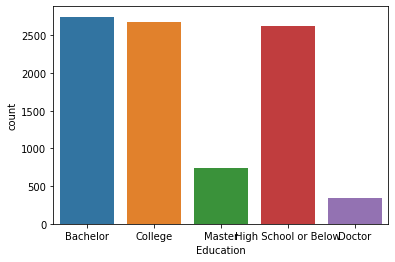

In [17]:
# lets check the education background :
print(data['Education'].unique())
sns.countplot(data['Education'])

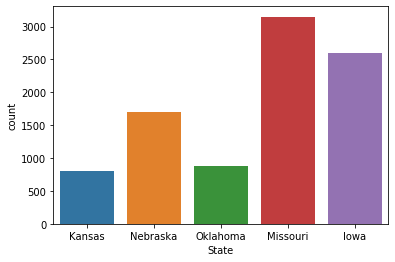

In [18]:
# check which states are present :
sns.countplot(data['State'])

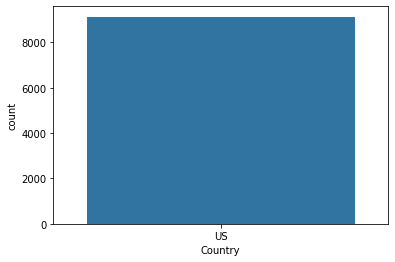

In [19]:
sns.countplot(data['Country'])

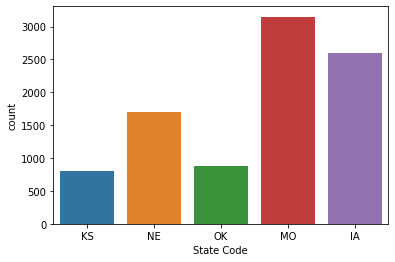

In [20]:
#which state code having more numbers :
sns.countplot(data['State Code'])

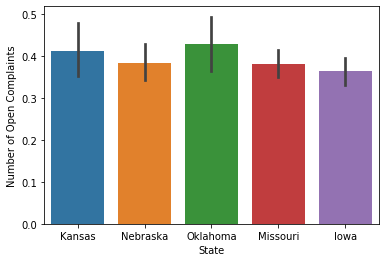

In [21]:
sns.barplot(x="State",y="Number of Open Complaints",data=data)
plt.show()

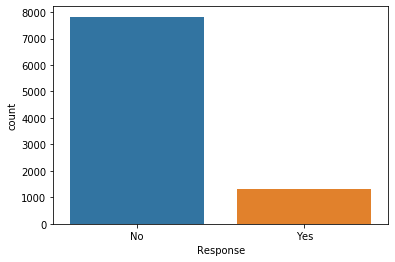

In [22]:
sns.countplot(x="Response",data=data)
plt.show()

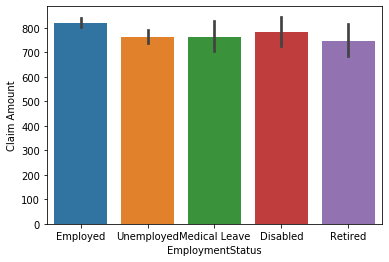

In [23]:
sns.barplot(x="EmploymentStatus",y="Claim Amount",data=data)
plt.show()

In [24]:
# importing labelencoder to convert catagorical values to numerical :
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [25]:
for i in data.columns:
    if data[i].dtypes == 'object':
        data[i]=le.fit_transform(data[i])

In [26]:
data.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,600,0,1,1,276.351928,0,0,0,47,1,...,5,0,1,0,2,0,0,384.811147,5,1
1,5946,0,3,3,697.953590,0,1,0,24,4,...,42,0,8,1,5,3,0,1131.464935,0,1
2,96,0,4,4,1288.743165,0,2,0,41,1,...,38,0,2,1,5,0,0,566.472247,5,1
3,8016,0,2,2,764.586183,0,0,0,12,4,...,65,0,7,0,1,0,2,529.881344,3,1
4,2488,0,1,1,281.369258,0,0,0,52,1,...,44,0,1,1,3,0,0,138.130879,0,1


In [27]:
# lets check the skewness :
data.skew()

Customer                         0.000000
Country                          0.000000
State Code                       0.021065
State                            0.021065
Claim Amount                     3.032280
Response                         2.037567
Coverage                         1.031310
Education                        0.333148
Effective To Date                0.033899
EmploymentStatus                 0.832147
Gender                           0.039866
Income                           0.286887
Location Code                    0.009511
Marital Status                  -0.107553
Monthly Premium Auto             2.123546
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        2.783263
Number of Policies               1.253333
Policy Type                     -0.468383
Policy                          -0.427639
Claim Reason                     0.733526
Sales Channel                    0.506774
Total Claim Amount               1

In [28]:
# lets treat the skewness in the input dataset :
import numpy as np
for index in data.skew().index:
    if data.skew().loc[index]>0.5:
        data[index]=np.log1p(data[index])
    if data.skew().loc[index]<-0.5:
        data[index]=np.square(data[index])

In [29]:
data.skew()

Customer                         0.000000
Country                          0.000000
State Code                       0.021065
State                            0.021065
Claim Amount                     0.578248
Response                         2.037567
Coverage                         0.700634
Education                        0.333148
Effective To Date                0.033899
EmploymentStatus                 0.402923
Gender                           0.039866
Income                           0.286887
Location Code                    0.009511
Marital Status                  -0.107553
Monthly Premium Auto             1.013663
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        1.999011
Number of Policies               0.657633
Policy Type                     -0.468383
Policy                          -0.427639
Claim Reason                     0.226491
Sales Channel                    0.038853
Total Claim Amount              -0

In [30]:
# splitting the data into input and output :
X=data.drop('Total Claim Amount',axis=1)
y=data['Total Claim Amount']

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [32]:
# importing the standard scaler:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [33]:
# importing esential libraries :
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score

In [34]:
# here we will create the object :
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
KNR=KNeighborsRegressor()
DTR=DecisionTreeRegressor(random_state=42)
ABR=AdaBoostRegressor(random_state=42)
RFR=RandomForestRegressor(random_state=42)
GBR=GradientBoostingRegressor(random_state=42)

In [35]:
models=[]
models.append(('LinearRegression',LR))
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))

In [ ]:

Model=[]
R2_score=[]
cvs=[]
MSE=[]
for name,model in models:
    print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>',name,'<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<')
    print('\n',model)
    Model.append(name)
    model.fit(X_train,y_train)
    predm=model.predict(X_test)
    r2=r2_score(y_test,predm)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,predm)
    print("Mean_Squared_Error =",mse)
    MSE.append(round(mse,3))
    score= cross_val_score(model,X,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(score)
    print('\n')

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> LinearRegression <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2_score =  0.5603950645537765
Mean_Squared_Error = 36.272968378118165
Cross_Val_Score =  0.5585353663051553


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Lasso <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

 Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
R2_score =  0.37210449790491784
Mean_Squared_Error = 51.809322088568024
Cross_Val_Score =  0.3700796820352453


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Ridge <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
R2_score =  0.5604152768431674
Mean_Squared_Error = 36.2713006085487
Cross_Val_Score =  0.5585374341636362


>>>>>>>>>>>>>>>>>>>>>>>>>>>>

In [ ]:
final= pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Cross_val_score':cvs})
final

# Conclusion: We will go with RandomForestRegressor. having less R2_score-0.8247 and Mean_Squared_Error-14.45

In [ ]:
import joblib
joblib.dump(RFR,'Insuranceclaim.csv')

In [ ]:
model=joblib.load('Insuranceclaim.csv')

In [ ]:
model.predict(X_test)